In [1]:
library(MASS)
library(cluster)
library(clusterSim) 

# library(e1071) # for C-means

In [2]:
data(iris)


Call:
hclust(d = SampleData, method = "average")

Cluster method   : average 
Distance         : euclidean 
Number of objects: 30 



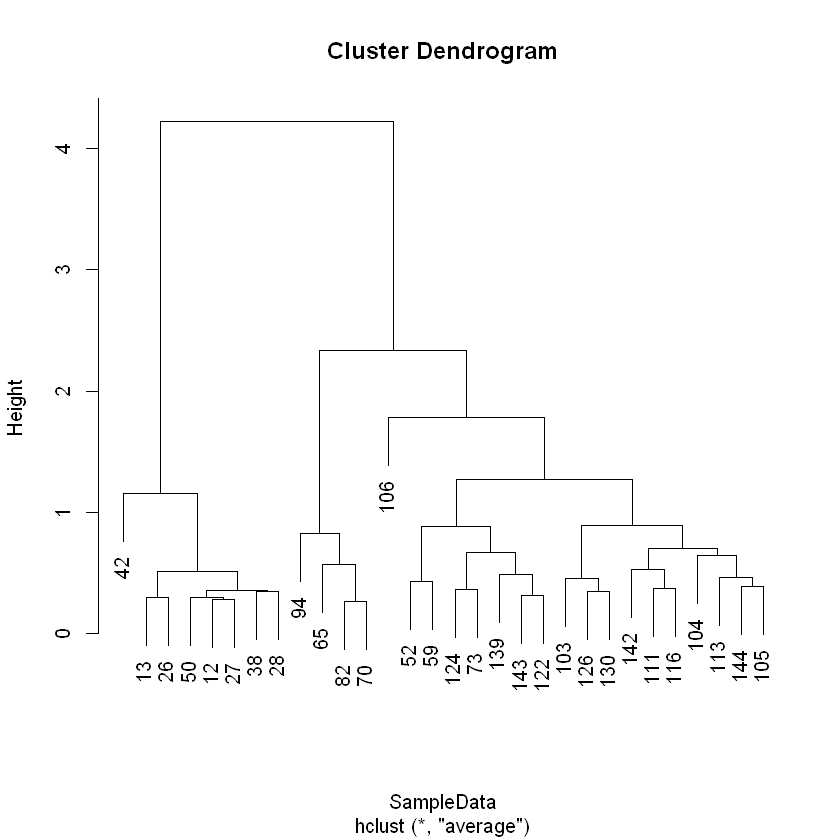

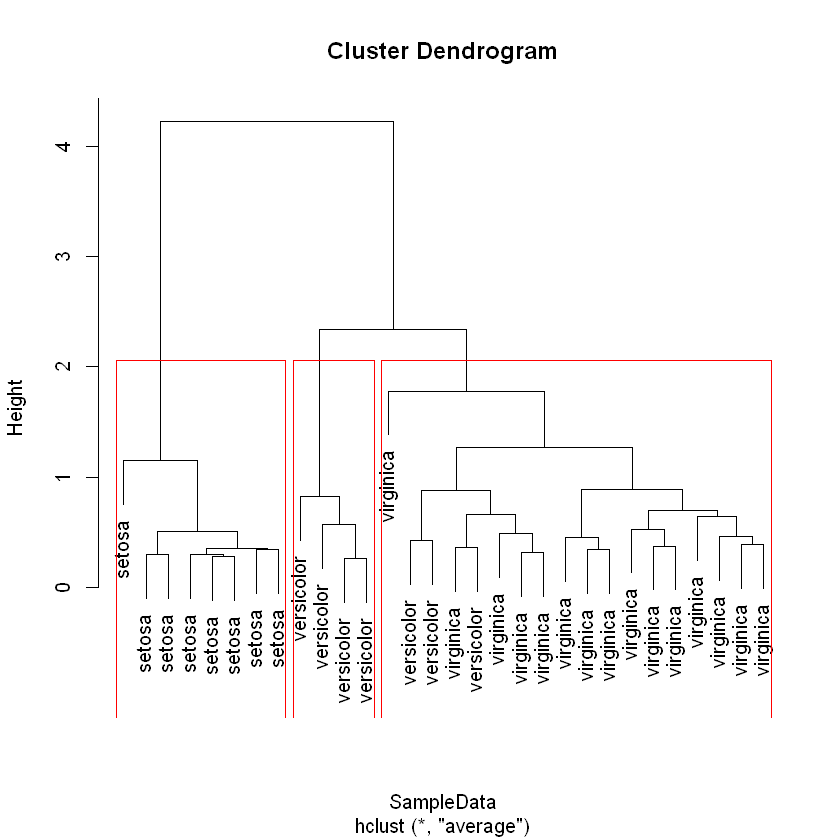

In [3]:
# 取1/5的資料來測試
id <- sample(1:nrow(iris), 0.2*nrow(iris))

SampleData <- dist(iris[id, -5]) # 命名data(會變成x軸的label)
result.hc <- hclust(SampleData, method="average")
print(result.hc)

# 可視化
plot(result.hc) # 若不貼上標籤只會顯示編號

# 貼上標籤
plot(result.hc, labels=iris$Species[id])

# 加上外框
rect.hclust(result.hc, k=3, border="red")

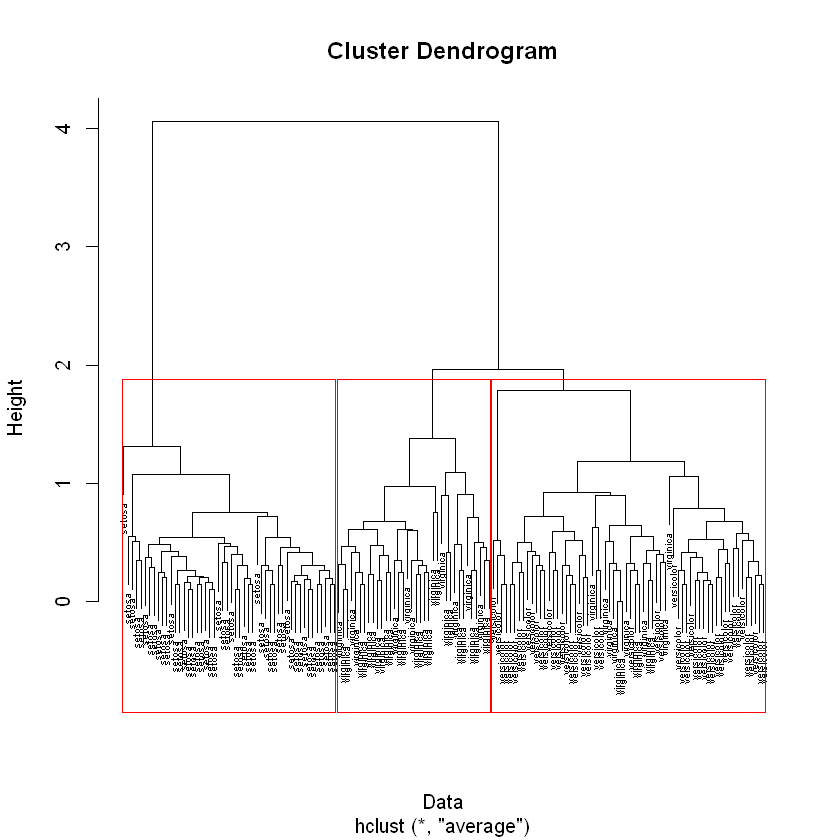

In [4]:
# 測試原data
Data <- dist(iris[, -5])
fitHC <- hclust(Data, method="average")
plot(fitHC, labels=iris$Species, cex=0.5)
rect.hclust(fitHC, k=3, border="red")

In [5]:
# 剪枝分為三群來看階層式聚類的效果
result.iris <- cutree(fitHC, k=3)
table(iris$Species, result.iris)

            result.iris
              1  2  3
  setosa     50  0  0
  versicolor  0 50  0
  virginica   0 14 36

In [6]:
# 計算最佳分類群數
min.nc <- 2
max.nc <- 8
bias <- min.nc-1

# 使用方法 (最近法, 最遠法, 平均法, 中心法, 華德法)
method.hc = c("single", "complete", "average", "centroid", "ward.D2")
HC= array(0, c(max.nc-bias, length(method.hc)))

for (nc in min.nc : max.nc)
    {
     for (m in 1 : length(method.hc))
         {
          fithc <- hclust(dist(iris[, -5]), method=method.hc[m])
          ct <- cutree(fithc, k=nc)
          HC[nc-bias, m] <- index.DB(iris[, -5], ct, centrotypes="centroids")$DB
         }
    }

cat('The better cluster number by single:',
    which(HC[,1]==min(HC[,1]))+bias)
cat('\nThe better cluster number by complete:',
    which(HC[,2]==min(HC[,2]))+bias)
cat('\nThe better cluster number by average:',
    which(HC[,3]==min(HC[,3]))+bias)
cat('\nThe better cluster number by centroid:',
    which(HC[,4]==min(HC[,4]))+bias)
cat('\nThe better cluster number by ward.D2:',
    which(HC[,5]==min(HC[,5]))+bias)

The better cluster number by single: 2
The better cluster number by complete: 3
The better cluster number by average: 2
The better cluster number by centroid: 2
The better cluster number by ward.D2: 2

# NBA資料集(National Basketball Association)

In [7]:
# 讀入資料
nba <- read.csv("../data_files/2011NBA.csv", header=T, sep=",")
nba[1:5,]
# 平均得分(points per game)、平均籃板(rebounds)、平均助攻(assists per game)、單場火鍋(blocks per game)、單場抄截(steals per game) 

,player,division,ppg,rpg,apg,blk,stl
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,LeBron James,East,27.1,7.9,6.2,0.81,1.85
2,Kevin Durant,West,28.0,8.0,3.5,1.17,1.33
3,Dwight Howard,East,20.6,14.5,1.9,2.15,1.50
4,Christ Paul,West,19.8,3.6,9.1,0.07,2.53
5,Derrick Rose,East,21.8,3.4,7.9,0.72,0.90


In [8]:
# 整理資料
nba.clus <- nba[,-c(1,2)] # remove text columns: player & division
means <- apply(nba.clus, 2, mean) # get mean，2: column，1:row
sds <- apply(nba.clus, 2, sd) # get standard deviation，2:column，1:row

nba.clus <- scale(nba.clus, center=means, scale=sds)  # using Z-score normalization
nba.dist <- dist(nba.clus, method="euclidean") # Euclidean distance
nba.fit <- hclust(nba.dist, method="ward.D2") # Ward-distance based clustering

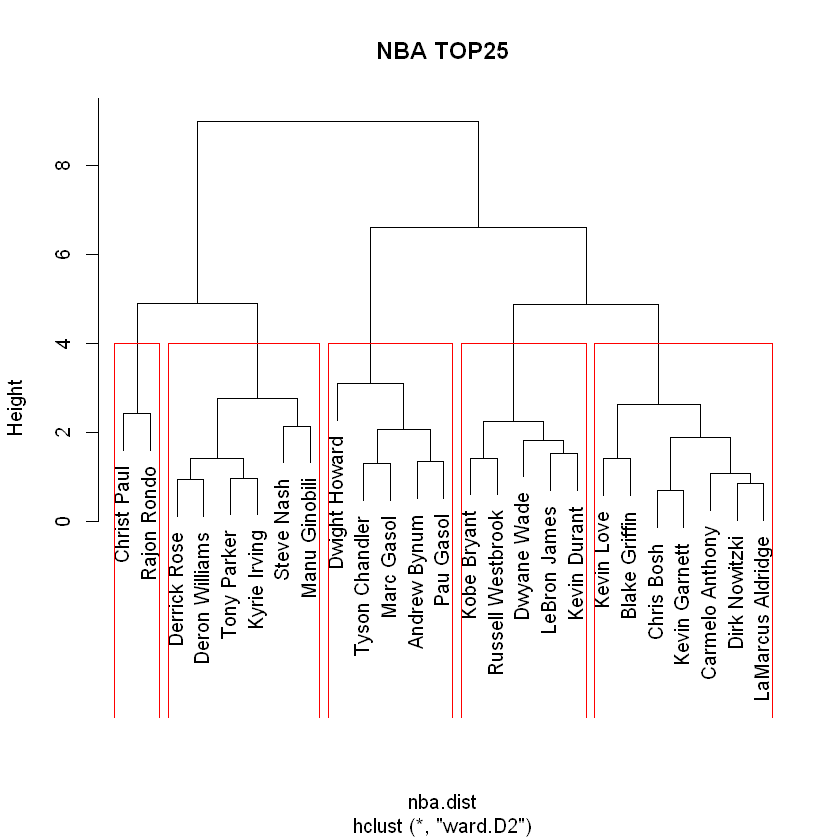

In [9]:
plot(nba.fit, labels=nba$player, main="NBA TOP25") #tree-based dendrograms
rect.hclust(nba.fit, k=5, border="red") #Using redlines to define boundaries

In [10]:
# 指定集群分析為5群 (assigned by 5 clusters)
cluster5<-cutree(nba.fit, k=5)

# 顯示全部的群集
print(sapply(unique(cluster5), function(a)nba$player[cluster5==a]))
             
# 顯示屬於第一集群的分析結果 (show cluster 1)
# nba$player[cluster5==1]
             

[[1]]
[1] "LeBron James"      "Kevin Durant"      "Kobe Bryant"      
[4] "Dwyane Wade"       "Russell Westbrook"

[[2]]
[1] "Dwight Howard"  "Andrew Bynum"   "Pau Gasol"      "Tyson Chandler"
[5] "Marc Gasol"    

[[3]]
[1] "Christ Paul" "Rajon Rondo"

[[4]]
[1] "Derrick Rose"   "Deron Williams" "Tony Parker"    "Steve Nash"    
[5] "Kyrie Irving"   "Manu Ginobili" 

[[5]]
[1] "Kevin Love"        "Dirk Nowitzki"     "Blake Griffin"    
[4] "Carmelo Anthony"   "Chris Bosh"        "LaMarcus Aldridge"
[7] "Kevin Garnett"    



In [11]:
# 合併聚類結果
nba.new <- cbind(nba, cluster5)
nba.new[1:5,]

# 貼上結果標籤
# the five groups as score (得分)、defender (防守)、guard (控衛)、combo guard (全能衛)、power forward (大前鋒)
nba.new$cluster5 <- factor(nba.new$cluster5, levels=c(1:5), labels=c("scorer", "defender", "point-guard", "combo-guard", "power-forward"))
names(nba.new)[8] <- "positions"
nba.new[1:5,]

,player,division,ppg,rpg,apg,blk,stl,cluster5
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,LeBron James,East,27.1,7.9,6.2,0.81,1.85,1
2,Kevin Durant,West,28.0,8.0,3.5,1.17,1.33,1
3,Dwight Howard,East,20.6,14.5,1.9,2.15,1.50,2
4,Christ Paul,West,19.8,3.6,9.1,0.07,2.53,3
5,Derrick Rose,East,21.8,3.4,7.9,0.72,0.90,4


,player,division,ppg,rpg,apg,blk,stl,positions
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,LeBron James,East,27.1,7.9,6.2,0.81,1.85,scorer
2,Kevin Durant,West,28.0,8.0,3.5,1.17,1.33,scorer
3,Dwight Howard,East,20.6,14.5,1.9,2.15,1.50,defender
4,Christ Paul,West,19.8,3.6,9.1,0.07,2.53,point-guard
5,Derrick Rose,East,21.8,3.4,7.9,0.72,0.90,combo-guard


In [12]:
# 分析各指標對positions影響
positions <- nba.new$positions
table(nba.new$division, positions) # Compare distribution in east/west regions
cor(nba[c(3:7)], use="pairwise") # correlation coefficient (相關係數初步判定)
anova(lm(nba.new$ppg~factor(positions))) # one-way ANOVA (平均得分與球員類型)

      positions
       scorer defender point-guard combo-guard power-forward
  East      2        2           1           3             3
  West      3        3           1           3             4

,ppg,rpg,apg,blk,stl
ppg,1.00000000,0.1276505,-0.1755156,-0.04644133,0.2778124
rpg,0.12765047,1.0000000,-0.7300230,0.72112107,-0.2506524
apg,-0.17551556,-0.7300230,1.0000000,-0.64151949,0.4300765
blk,-0.04644133,0.7211211,-0.6415195,1.00000000,-0.2155663
stl,0.27781242,-0.2506524,0.4300765,-0.21556629,1.0000000


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
factor(positions),4,301.8320,75.45801,5.876939,0.002697893
Residuals,20,256.7936,12.83968,NA,NA
